# Capstone Project — The Battle of Neighbourhoods

### 1. Introduction

New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. We all know that Indians love spicy foods but how do they accept the western food? How much they like the most common drink in western countries, like coffee? So as part of this project , we will list and visualise all major parts of New Delhi City.

### 1.1 Questions that can be asked using the above mentioned datasets

* What is best location in New Delhi City for a Cafe ?
* Which areas have large number of Cafe Market ?
* Which areas have less number of resturants ?
* Which is the best place to stay if I prefer to drink a good cup of Cofee ?
* What places are have the best restaurants in New Delhi?

### 1.2 Data

For this project we need the following data :

1. New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
  * Data source : [Zomato kaggel dataset](https://www.kaggle.com/shrutimehta/zomato-restaurants-data)
  * Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
2. Nearby places in each locality of new delhi city.
  * Data source : Fousquare API
  * Description : By using this api we will get all the venues in each neighborhood.

### 1.3 Approach
* Collect the new delhi city data from [Zomato kaggel dataset](https://www.kaggle.com/shrutimehta/zomato-restaurants-data)
* Use aggregative rating for each resturant to find the best places.
* Visualize the Ranking of neighborhoods using folium library(python)
* Use FourSquare API to find all venues for each neighborhood.
* Filter out the top 5 most common venues nearby.

In [306]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

# All requested packages already installed.



In [307]:
df = pd.read_csv('https://raw.githubusercontent.com/zoulifan87/Capstone-Project---The-Battle-of-Neighborhoods/main/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [308]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,2
1,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,46
2,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,Average,45
3,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,Average,11
4,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,238


### 2. Data Cleaning and Data Visualization

### 2.1 Data Cleaning¶
remove the unwanted columns and rows from dataset

In [309]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [310]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [311]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
1,Burger.in,Adchini,77.196923,28.535382,Fast Food,3.2,Average,46
2,Days of the Raj,Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",3.4,Average,45
3,Dilli Ka Dhaba,Adchini,77.198033,28.537547,"South Indian, North Indian",2.6,Average,11
4,Govardhan,Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",3.4,Average,238
5,Mezbaan Grills,Adchini,77.198122,28.538134,Mughlai,3.1,Average,8


### 2.2 What places have the best restaurants in New Delhi?

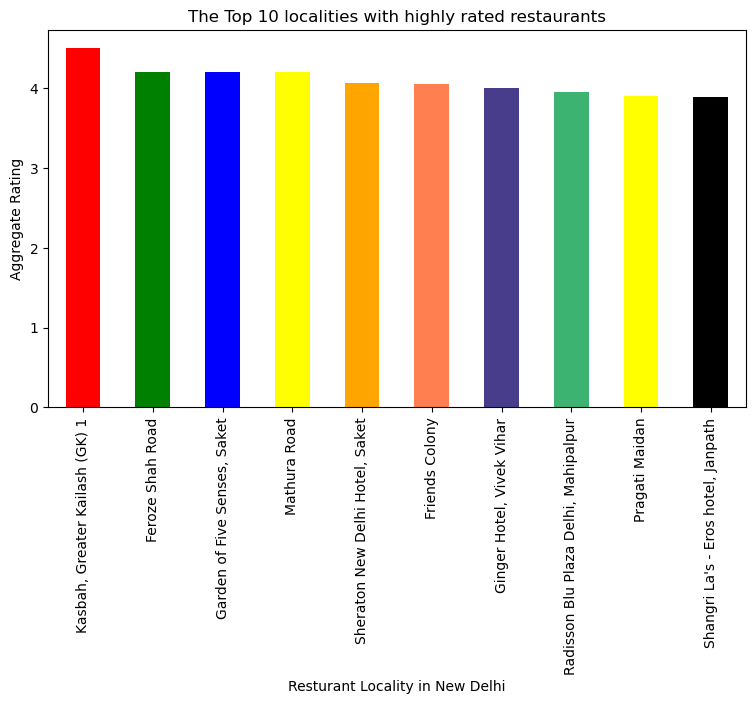

In [312]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Top 10 localities with highly rated restaurants')
#On x-axis

color_1 = ['red', 'green', 'blue', 'yellow','orange', 'coral', 'darkslateblue', 'mediumseagreen', 'yellow','black']

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar', color = color_1)

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


_The best restaurants are available in Kasbah and Greater Kailash area._

### 2.3 what places are have worst restaurants in New Dehli?

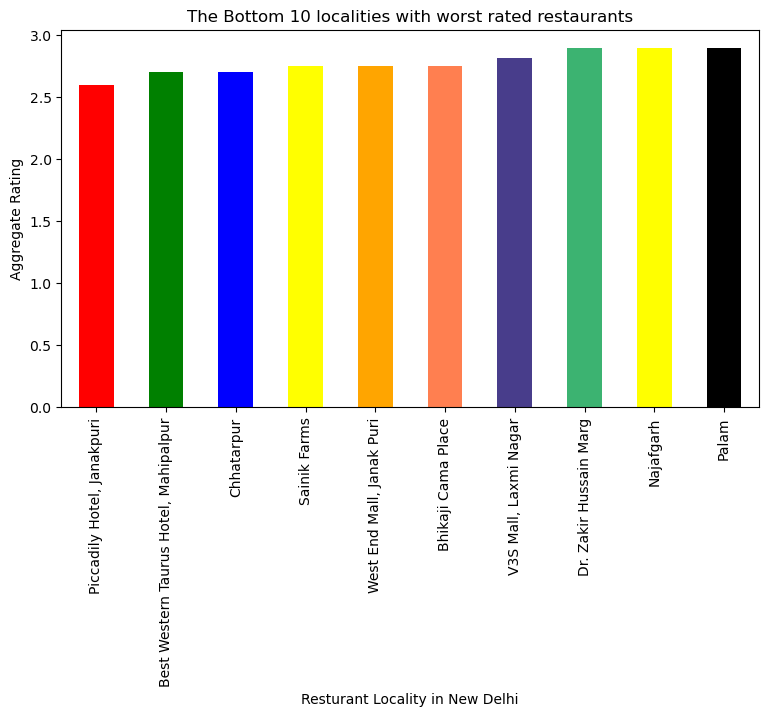

In [313]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Bottom 10 localities with worst rated restaurants')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar', color = color_1)

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()


_The worst restaurants are in Piccadily Hotel and Janakpuri area._

### 2.4 Which place do people tend the most to go to restaurant in New Dehli?

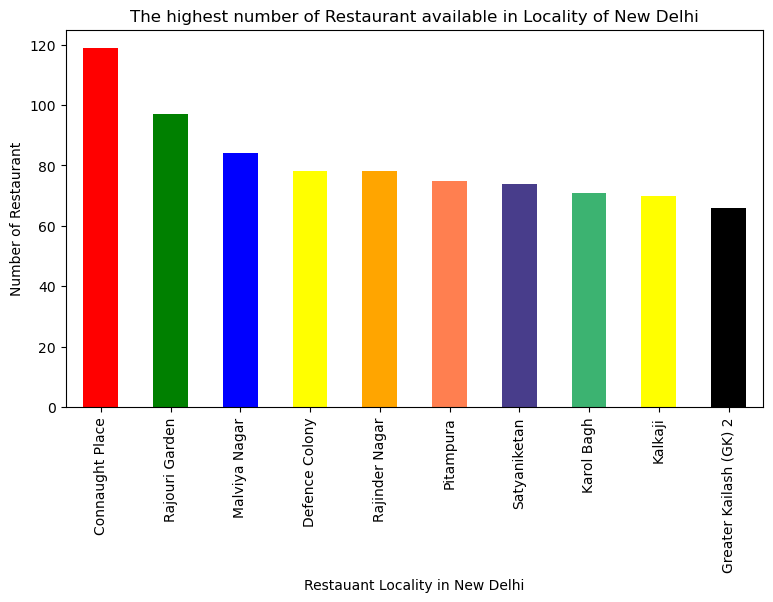

In [314]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar', color = color_1)

plt.xlabel('Restauant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()


_Connaught Place is the best area to attract people to stay and eat in restaurants._

### 2.5 Which place do people tend the least to go to restaurant in New Dehli ?

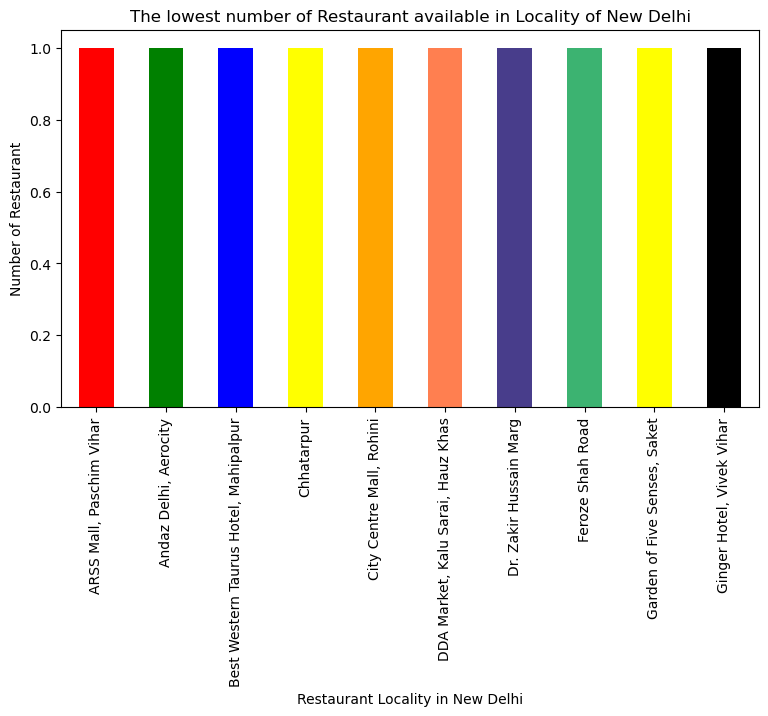

In [315]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar', color = color_1)

plt.xlabel('Restaurant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()


### 2.5 What are the best places for Café in New Delhi city?

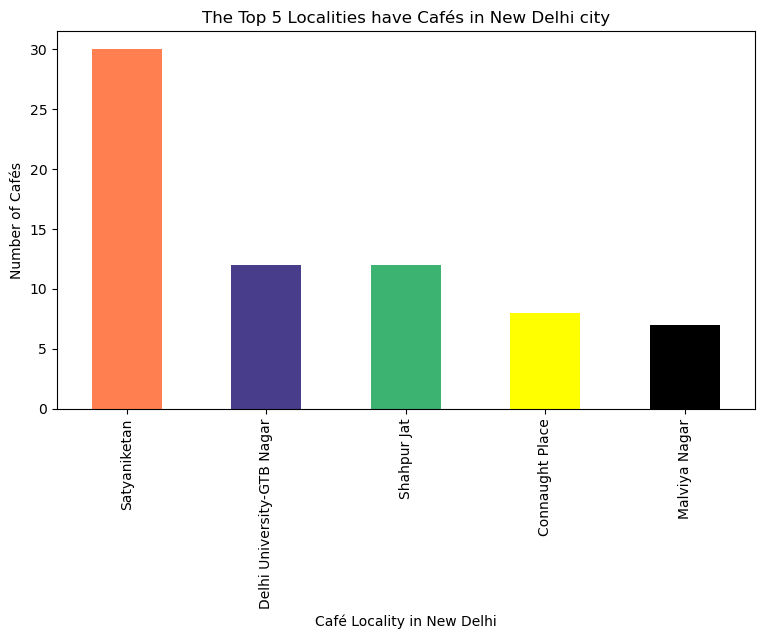

In [316]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Top 5 Localities have Cafés in New Delhi city')
#On x-axis

color_2 =['coral', 'darkslateblue', 'mediumseagreen', 'yellow','black']

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Cafe')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar', color = color_2)

plt.xlabel('Café Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Cafés')

#displays the plot
plt.show()


_Satyaniketan is the best place for Cafe._

### 2.6 Which places have the best Cafés in New Delhi?

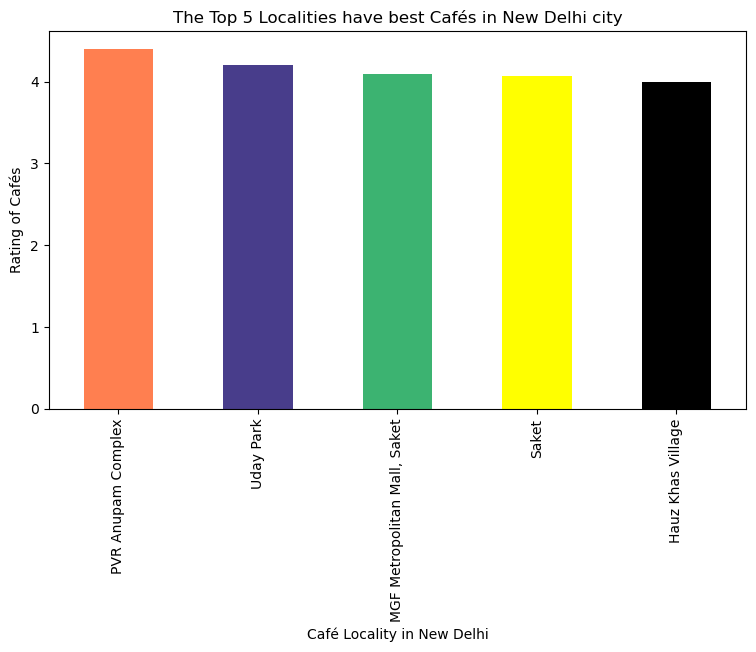

In [317]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Top 5 Localities have best Cafés in New Delhi city')
#On x-axis
color_2 =['coral', 'darkslateblue', 'mediumseagreen', 'yellow','black']
#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Cafe')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar', color = color_2)

plt.xlabel('Café Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of Cafés')

#displays the plot
plt.show()


### 3. Use Foursquare to visualize and explore venues in New Delhi City

_PVR Anupam Complex is the area has the best Cafes in New Delhi._


### 3.1 Data transformation
Based on Locality grouping the data.

In [318]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [319]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"ARSS Mall, Paschim Vihar",28.668945,77.101544,1,"North Indian, South Indian, Chinese, Mithai, F...",3.100000,Average,117
1,Adchini,28.537063,77.197808,13,"Fast Food, North Indian, Seafood, Continental,...",3.292308,"Average, Good, Poor, Very Good",1560
2,"Aditya Mega Mall, Karkardooma",28.656131,77.301266,4,"Finger Food, North Indian, Mughlai, Pizza, Fas...",3.275000,"Average, Good",434
3,Aerocity,28.553077,77.104270,2,"Fast Food, Italian, Pizza, North Indian, Conti...",3.200000,Average,59
4,"Aggarwal City Mall, Pitampura",28.690020,77.134650,3,"North Indian, Chinese, Street Food, Mithai, No...",3.033333,Average,126


In [320]:
df_final.shape

(240, 8)

### 3.2 Define Foursquare Credentials and Version.

In [321]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'ZJSMHFRB2IYW5TFXCPTABKCKWJDR0N4M1I4I3NOVUNTWZFXK' # Foursquare ID
CLIENT_SECRET = 'KGKG1NBIKSEKF3PUBIIBKOU1VJWDMUMBJ5TNQCR50XZ34R00' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZJSMHFRB2IYW5TFXCPTABKCKWJDR0N4M1I4I3NOVUNTWZFXK
CLIENT_SECRET:KGKG1NBIKSEKF3PUBIIBKOU1VJWDMUMBJ5TNQCR50XZ34R00


### 3.3 Create a function to repeat the same process to all the Localities in New Delhi.

In [322]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### 3.4 Find the all the venues' locality in New Delhi.

In [323]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [324]:
new_Delhi_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ARSS Mall, Paschim Vihar",9,9,9,9,9,9
Adchini,5,5,5,5,5,5
"Aditya Mega Mall, Karkardooma",10,10,10,10,10,10
Aerocity,7,7,7,7,7,7
"Aggarwal City Mall, Pitampura",5,5,5,5,5,5
...,...,...,...,...,...,...
"West Gate Mall, Rajouri Garden",15,15,15,15,15,15
West Patel Nagar,5,5,5,5,5,5
"Worldmark 1, Aerocity",28,28,28,28,28,28


In [325]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 215 uniques categories.


In [326]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

,Locality,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store
0,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"ARSS Mall, Paschim Vihar",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

,Locality,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store
0,"ARSS Mall, Paschim Vihar",0.111111,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adchini,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Aditya Mega Mall, Karkardooma",0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aerocity,0.000000,0.000000,0.0,0.0,0.0,0.142857,0.0,0.142857,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Aggarwal City Mall, Pitampura",0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,"West Gate Mall, Rajouri Garden",0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.066667,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,West Patel Nagar,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,"Worldmark 1, Aerocity",0.000000,0.035714,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,Yusuf Sarai,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
New_Delhi_grouped.shape

(238, 216)

In [329]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2              Market  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0               Café   0.4
1  Indian Restaurant   0.2
2                Pub   0.2
3   Parsi Restaurant   0.2
4                ATM   0.0


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1          Multiplex   0.2
2      Shopping Mall   0.2
3  Indian Restaurant   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1  Fast Food Restaurant  0.14
2        Airport Lounge  0.14
3           Coffee Shop  0.14
4      Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                venue  freq
0    Department Store   0.2
1         Pizza Place   0.2
2   Indian Restaurant   0.2
3  Chinese Restaurant   0.2
4    Business Service   0.2


----Agga

In [330]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [331]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"ARSS Mall, Paschim Vihar",Indian Restaurant,Sandwich Place,Market,Multicuisine Indian Restaurant,Coffee Shop
1,Adchini,Café,Indian Restaurant,Parsi Restaurant,Pub,Women's Store
2,"Aditya Mega Mall, Karkardooma",Pizza Place,Indian Restaurant,Shopping Mall,Multiplex,Café
3,Aerocity,Hotel,Airport Terminal,Airport Lounge,Rental Car Location,Coffee Shop
4,"Aggarwal City Mall, Pitampura",Pizza Place,Business Service,Chinese Restaurant,Department Store,Indian Restaurant
...,...,...,...,...,...,...
233,"West Gate Mall, Rajouri Garden",Fast Food Restaurant,Café,Restaurant,Pizza Place,Shopping Mall
234,West Patel Nagar,Pizza Place,Hotel,Electronics Store,Gym / Fitness Center,Metro Station
235,"Worldmark 1, Aerocity",Hotel,Indian Restaurant,Hotel Bar,Bed & Breakfast,Coffee Shop
236,Yusuf Sarai,Chinese Restaurant,Indian Restaurant,Coffee Shop,Park,Bar


In [332]:
## Cluster Locality
## Run k-means to cluster the Localities into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [333]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"ARSS Mall, Paschim Vihar",28.668945,77.101544,1,"North Indian, South Indian, Chinese, Mithai, F...",3.100000,Average,117,1,Indian Restaurant,Sandwich Place,Market,Multicuisine Indian Restaurant,Coffee Shop
1,Adchini,28.537063,77.197808,13,"Fast Food, North Indian, Seafood, Continental,...",3.292308,"Average, Good, Poor, Very Good",1560,4,Café,Indian Restaurant,Parsi Restaurant,Pub,Women's Store
2,"Aditya Mega Mall, Karkardooma",28.656131,77.301266,4,"Finger Food, North Indian, Mughlai, Pizza, Fas...",3.275000,"Average, Good",434,1,Pizza Place,Indian Restaurant,Shopping Mall,Multiplex,Café
3,Aerocity,28.553077,77.104270,2,"Fast Food, Italian, Pizza, North Indian, Conti...",3.200000,Average,59,3,Hotel,Airport Terminal,Airport Lounge,Rental Car Location,Coffee Shop
4,"Aggarwal City Mall, Pitampura",28.690020,77.134650,3,"North Indian, Chinese, Street Food, Mithai, No...",3.033333,Average,126,1,Pizza Place,Business Service,Chinese Restaurant,Department Store,Indian Restaurant


In [334]:
for x in range(9,14):
    y = New_Delhi_merged[New_Delhi_merged.columns[x]].str.startswith('Café').value_counts()[1]
    z = (y / 238)*100
    percentage = format(round(z,2))
   
    print('Locality number regards Cafe as the ' + New_Delhi_merged.columns[x],':', y, '/','Percentage in total:',percentage,'%')               

Locality number regards Cafe as the 1st Most Common Venue : 21 / Percentage in total: 8.82 %
Locality number regards Cafe as the 2nd Most Common Venue : 13 / Percentage in total: 5.46 %
Locality number regards Cafe as the 3rd Most Common Venue : 15 / Percentage in total: 6.3 %
Locality number regards Cafe as the 4th Most Common Venue : 9 / Percentage in total: 3.78 %
Locality number regards Cafe as the 5th Most Common Venue : 10 / Percentage in total: 4.2 %


_Although Indian people prefer spicy food, their interest in western food is noticeable. Among the 283 localities, Café is listed in the Top 5 most common venues in 68 localities. The percentage is 28.56%._


In [335]:
New_Delhi_Clustered =  New_Delhi_merged[New_Delhi_merged['1st Most Common Venue'] == 'Café'].groupby('Cluster Labels').count()
New_Delhi_Clustered[['1st Most Common Venue']]

,1st Most Common Venue
Cluster Labels,
0,4
1,3
3,1
4,13


In [336]:
# create final map

map_clusters = folium.Map(location=[28.52, 77.25], zoom_start=10)

# set color scheme for the clusters
x_m = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

colors = ['purple', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 3.5 Cluster Examines

In [337]:
## Examine Clusters

## Cluster 1: South-west of New Delhi:
Cluster_1 = New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[0] + list(range(5, New_Delhi_merged.shape[1]))]]
print('Number of rows:', Cluster_1.shape)
Cluster_1 = New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[0] + list(range(5, New_Delhi_merged.shape[1]))]]
Cluster_1['1st Most Common Venue'].str.startswith('Café').value_counts()

Number of rows: (109, 10)


False    104
True       4
Name: 1st Most Common Venue, dtype: int64

In [338]:
Cluster_1

,Locality,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,"Aggarwal City Plaza, Rohini",3.040000,"Average, Good, Poor",594,0,Pizza Place,Bus Station,Multiplex,Sandwich Place,Gym / Fitness Center
6,Alaknanda,3.117391,"Average, Good, Poor",1012,0,New American Restaurant,Coffee Shop,Steakhouse,Food & Drink Shop,Market
7,"Ambience Mall, Vasant Kunj",3.425000,"Average, Good, Very Good",2460,0,Coffee Shop,Shopping Mall,Fast Food Restaurant,Italian Restaurant,Clothing Store
11,"Ansal Plaza Mall, Khel Gaon Marg",3.750000,"Average, Good, Very Good",875,0,Department Store,Performing Arts Venue,Fast Food Restaurant,Snack Place,Dim Sum Restaurant
13,Ashok Vihar Phase 1,3.090000,"Average, Good, Poor",971,0,Pizza Place,BBQ Joint,Market,Dessert Shop,Smoke Shop
...,...,...,...,...,...,...,...,...,...,...
230,Vikas Marg,3.400000,Average,19,0,ATM,Burger Joint,Café,Burrito Place,Pharmacy
231,Vikaspuri,3.062264,"Average, Good, Poor",1253,0,Pizza Place,Fast Food Restaurant,Ice Cream Shop,Furniture / Home Store,Frozen Yogurt Shop
232,Vivek Vihar,3.077273,"Average, Good, Poor",939,0,Juice Bar,Athletics & Sports,Department Store,Bed & Breakfast,Women's Store
233,Wazirpur,3.050000,Average,86,0,NaN,NaN,NaN,NaN,NaN


In [339]:
## Examine Clusters
## Cluster 2
Cluster_2 = New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[0] + list(range(5, New_Delhi_merged.shape[1]))]]
print('Number of rows:', Cluster_2.shape)
Cluster_2['1st Most Common Venue'].str.startswith('Café').value_counts()

Number of rows: (49, 10)


False    46
True      3
Name: 1st Most Common Venue, dtype: int64

In [340]:
## Examine Clusters

## Cluster 3
Cluster_3 = New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[0] + list(range(5, New_Delhi_merged.shape[1]))]]
print('Number of rows:', Cluster_3.shape)
Cluster_3['1st Most Common Venue'].str.startswith('Café').value_counts()

Number of rows: (2, 10)


False    2
Name: 1st Most Common Venue, dtype: int64

In [341]:
## Examine Clusters
## Cluster 4
Cluster_4 = New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[0] + list(range(5, New_Delhi_merged.shape[1]))]]
print('Number of Rows:', Cluster_4.shape)
Cluster_4['1st Most Common Venue'].str.startswith('Café').value_counts()

Number of Rows: (33, 10)


False    32
True      1
Name: 1st Most Common Venue, dtype: int64

In [342]:
## Examine Clusters

## Cluster 5
Cluster_5 = New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[0] + list(range(5, New_Delhi_merged.shape[1]))]]

print('Number of rows:', Cluster_5.shape)
Cluster_5['1st Most Common Venue'].str.startswith('Café').value_counts()

Number of rows: (45, 10)


False    31
True     13
Name: 1st Most Common Venue, dtype: int64

In [343]:
for x in range(5,10):
    y = Cluster_1[Cluster_5.columns[x]].str.startswith('Café').value_counts()[1]
    z =(y / 45)*100
    percentage = format(round(z,2))
    print('Locality number regards Cafe as the ' + Cluster_5.columns[x],':', y, '/','Percentage in total:',percentage,'%')
             

Locality number regards Cafe as the 1st Most Common Venue : 4 / Percentage in total: 8.89 %
Locality number regards Cafe as the 2nd Most Common Venue : 5 / Percentage in total: 11.11 %
Locality number regards Cafe as the 3rd Most Common Venue : 7 / Percentage in total: 15.56 %
Locality number regards Cafe as the 4th Most Common Venue : 5 / Percentage in total: 11.11 %
Locality number regards Cafe as the 5th Most Common Venue : 4 / Percentage in total: 8.89 %


_In the Cluster 5 area, Café is very popular : 55.56% localities have Cafés as the Top 5 most common venues._

### 4. Conclusion:

According to the observation generated by the data, we can conclude points as follows:

1. According to the Clusters examines, we can say that the popularity of Café is noticeable and it has a very good market in the particular area: Cluster 5.
2. The Cafe can open at areas that have the best restaurants, such as Kasbah and Greater Kailash.
3. Or at the best area to attract people to stay and eat, such as Connaught.
4. Or at PVR Anupam Complex where has the best Cafe of New Delhi.
5. Or at Satyaniketan where has the most Cafes in New Delhi.
6. However, there are some areas that we shall avoid too, such as Piccadily Hotel and Janakpuri, because of the bad score of local restaurants.